<a href="https://colab.research.google.com/github/Shyams728/machine_learning_projects/blob/main/kannada_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Kaggle library
!pip install kaggle

# Upload your Kaggle API key (kaggle.json) to Colab
from google.colab import files
files.upload()

# Move the API key to the appropriate directory
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Download the dataset
!kaggle datasets download -d higgstachyon/kannada-mnist -p /content

# Unzip the dataset
!unzip /content/kannada-mnist.zip -d /content


Saving kaggle.json to kaggle.json
 48% 10.0M/20.8M [00:00<00:00, 28.3MB/s]
100% 20.8M/20.8M [00:00<00:00, 53.2MB/s]
Archive:  /content/kannada-mnist.zip
  inflating: /content/Kannada_MNIST_datataset_paper/Kannada_MNIST_Ubyte_gz/Dig_MNIST/X_dig_MNIST-idx3-ubyte/  (         
  inflating: /content/Kannada_MNIST_datataset_paper/Kannada_MNIST_Ubyte_gz/Dig_MNIST/y_dig_MNIST-idx1-ubyte/y_dig_MNIST-idx1-ubyte  
  inflating: /content/Kannada_MNIST_datataset_paper/Kannada_MNIST_Ubyte_gz/Kannada_MNIST/X_kannada_MNIST_test-idx3-ubyte/  '        
  inflating: /content/Kannada_MNIST_datataset_paper/Kannada_MNIST_Ubyte_gz/Kannada_MNIST/X_kannada_MNIST_test-idx3-ubyte/qтХЮ  cтХа┬а                    тХЮ   U┬а                    ├Ц┬▒тХЮ   U┬а                    ┬м┬╗  
  inflating: /content/Kannada_MNIST_datataset_paper/Kannada_MNIST_Ubyte_gz/Kannada_MNIST/X_kannada_MNIST_train-idx3-ubyte/  ╬й`        
  inflating: /content/Kannada_MNIST_datataset_paper/Kannada_MNIST_Ubyte_gz/Kannada_MNIST/X_kannada_MNI


**Problem Statement:**
You are given a dataset of Kannada digits, and the goal is to classify these digits into one of ten classes. Kannada is a language spoken in southwestern India, and the dataset contains handwritten Kannada digits.

**Dataset:**
- The dataset consists of 60,000 images for training and 10,000 images for testing.
- Each image is in grayscale and has a size of 28x28 pixels.

**Project Procedure:**

1. **Data Loading:**
   - Extract the dataset from the NPZ file, which contains the training and testing images along with their labels.

2. **PCA Dimensionality Reduction:**
   - Perform Principal Component Analysis (PCA) to reduce the dimensionality of the data from 28x28 (784 features) to 10 components.
   - This step is intended to reduce computational complexity while retaining as much useful information as possible.

3. **Model Selection:**
   - Implement and train the following machine learning models:
     - Decision Trees
     - Random Forest
     - Naive Bayes Model
     - K-Nearest Neighbors (K-NN) Classifier
     - Support Vector Machine (SVM)

4. **Model Evaluation:**
   - For each of the models, evaluate their performance using the following metrics:
     - Precision: Measures the ratio of true positives to the total predicted positives.
     - Recall: Measures the ratio of true positives to the total actual positives.
     - F1-Score: Combines precision and recall into a single metric.
     - Confusion Matrix: A table that shows the true positives, true negatives, false positives, and false negatives.
     - ROC-AUC Curve: Receiver Operating Characteristic curve and Area Under the Curve (AUC) to assess the model's classification performance.

5. **Experiment with Different Component Sizes:**
   - Repeat the entire experiment with different PCA component sizes (e.g., 15, 20, 25, 30) to observe how the choice of components affects model performance.
   - This step helps you understand how the trade-off between dimensionality reduction and model performance varies.

Overall, the project involves preprocessing the Kannada MNIST dataset, reducing its dimensionality with PCA, training various machine learning models, and evaluating their performance using standard classification metrics. By experimenting with different component sizes, you can gain insights into how the dimensionality reduction affects the models' abilities to classify Kannada digits accurately.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Function to load data from NPZ files
def load_data(file_path):
    data = np.load(file_path)
    return data['arr_0']

# Load training and testing data
train_data = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz')
test_data = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz')

# Load labels
y_train = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz')
y_test = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz')

# Flatten the image data
def flatten_data(data):
    return data.reshape(data.shape[0], -1)

# Initialize PCA with the desired number of components
def apply_pca(data, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# Train a classifier and return evaluation metrics
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate ROC-AUC score
    y_prob = classifier.predict_proba(X_test)

    # Define the class names based on your dataset
    class_names = np.unique(y_train)
    # Check the shape of y_prob
    if y_prob.ndim == 1:
    # If it's a 1D array, reshape it to a 2D array
      y_prob = y_prob.reshape(-1, 1)

    # Calculate ROC-AUC and prepare data for ROC curve plotting
    n_classes = len(np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Prepare ROC curve data
    roc_auc_data = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'class_names': class_names,
        'n_classes': n_classes
    }


    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

    return precision, recall, f1, confusion_matrix_result, roc_auc, roc_auc_data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, y_train, test_size=0.2, random_state=42)

# Define a list of classifiers to experiment with
classifiers = [
    DecisionTreeClassifier(random_state=42, criterion='entropy'),
    RandomForestClassifier(random_state=42),
    MultinomialNB(),
    KNeighborsClassifier(),
    SVC(probability=True)
]

# Dictionary to store results
results_dict = {}

# Experiment with different PCA component sizes
component_sizes = [10, 15, 20, 25]

for n_components in component_sizes:
    X_train_pca = apply_pca(flatten_data(X_train), n_components)
    X_test_pca = apply_pca(flatten_data(X_test), n_components)

    results = []
    for classifier in classifiers:
        model_name = classifier.__class__.__name__

        if model_name == 'MultinomialNB':
            # Use the MultinomialNB classifier without PCA for this specific case
            precision, recall, f1, confusion_matrix_result,roc_auc, roc_auc_data = train_and_evaluate_classifier(classifier, flatten_data(X_train), y_train, flatten_data(X_test), y_test)
        else:
            # For other classifiers, use PCA as before
            precision, recall, f1, confusion_matrix_result, roc_auc, roc_auc_data = train_and_evaluate_classifier(classifier, X_train_pca, y_train, X_test_pca, y_test)


        # precision, recall, f1, confusion_matrix_result = train_and_evaluate_classifier(classifier, X_train_pca, y_train, X_test_pca, y_test)
        print(f"{model_name} (PCA-{n_components}) - Precision: {precision}, Recall: {recall}, F1-Score: {f1},roc_auc: {roc_auc}")
        results.append([model_name, precision, recall, f1, roc_auc, roc_auc_data, confusion_matrix_result])

    results_dict[f'PCA-{n_components}'] = pd.DataFrame(results, columns=['Model', 'Precision', 'Recall', 'F1-Score', 'roc_auc', 'roc_auc_data', 'Confusion Matrix'])



DecisionTreeClassifier (PCA-10) - Precision: 0.8024370803121468, Recall: 0.8010833333333334, F1-Score: 0.7997721106443089,roc_auc: 0.8895329398310211
RandomForestClassifier (PCA-10) - Precision: 0.9056743793288303, Recall: 0.9053333333333333, F1-Score: 0.9052263861102814,roc_auc: 0.9943956649729786
MultinomialNB (PCA-10) - Precision: 0.9088156588820543, Recall: 0.9061666666666667, F1-Score: 0.9059850677491277,roc_auc: 0.9573476653990298
KNeighborsClassifier (PCA-10) - Precision: 0.8881549542117659, Recall: 0.8871666666666667, F1-Score: 0.8872402586134548,roc_auc: 0.9685854498136646
SVC (PCA-10) - Precision: 0.8883032149605326, Recall: 0.8859166666666667, F1-Score: 0.8865647140071691,roc_auc: 0.9915664574173962
DecisionTreeClassifier (PCA-15) - Precision: 0.8192900780799323, Recall: 0.8189166666666666, F1-Score: 0.8172187269596508,roc_auc: 0.8994254692017989
RandomForestClassifier (PCA-15) - Precision: 0.9352079472300946, Recall: 0.935, F1-Score: 0.9349634425565706,roc_auc: 0.9968024319

In [ ]:
results_dict['PCA-10']['Confusion Matrix'].shape

(5,)

In [ ]:
roc_auc_data = results_dict['PCA-10']['roc_auc_data']
plot_roc_curves(roc_auc_data)

In [ ]:
print(roc_auc_data)

0    {'fpr': {0: [0.0, 0.03187655917952509, 1.0], 1...
1    {'fpr': {0: [0.0, 9.239582370876836e-05, 9.239...
2    {'fpr': {0: [0.0, 0.008038436662662848, 0.0080...
3    {'fpr': {0: [0.0, 0.002125103945301672, 0.0050...
4    {'fpr': {0: [0.0, 0.0, 0.0, 9.239582370876836e...
Name: roc_auc_data, dtype: object


In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curves(roc_auc_data):
    plt.figure(figsize=(12, 6))
    colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown']
    for i in range(roc_auc_data['n_classes']):
        plt.plot(
            roc_auc_data['fpr'][i],
            roc_auc_data['tpr'][i],
            color=colors[i],
            lw=2,
            label=f'Class {i} (AUC = {roc_auc_data["roc_auc"][i]:.2f})'
        )
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()



# conf_matrix = results_dict['PCA-10']['Confusion Matrix']
# plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
# plt.yticks(np.arange(len(class_names)), class_names)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.tight_layout()
# plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import (
    precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
)

def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict using the classifier
    y_pred = classifier.predict(X_test)

    # Calculate ROC-AUC score
    y_prob = classifier.predict_proba(X_test)

    # Check the shape of y_prob
    if y_prob.ndim == 1:
        # If it's a 1D array, reshape it to a 2D array
        y_prob = y_prob.reshape(-1, 1)

    # Calculate ROC-AUC and prepare data for ROC curve plotting
    n_classes = len(np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Prepare ROC curve data
    roc_auc_data = {
        'fpr': fpr,
        'tpr': tpr,
        'roc_auc': roc_auc,
        'class_names': np.unique(y_train),
        'n_classes': n_classes
    }

    # Calculate other evaluation metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

    return precision, recall, f1, confusion_matrix_result, roc_auc, roc_auc_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Function to load data from NPZ files
def load_data(file_path):
    data = np.load(file_path)
    return data['arr_0']

# ... (rest of your code for loading data, PCA, and training classifiers)

# Now, let's visualize ROC curves and confusion matrices
def plot_roc_curves(fpr, tpr, roc_auc, class_names, n_classes):
    plt.figure(figsize=(12, 6))
    colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown']
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

# Define the class names based on your dataset
class_names = np.unique(y_train)

# Assuming you want to visualize results for 'PCA-10', you can select it like this:
n_classes = 10
data = results_dict['PCA-10']['roc_auc_data']
fpr, tpr, roc_auc = [], [], []

for roc_data in data:
    fpr_class, tpr_class, roc_auc_class = roc_data
    fpr.append(fpr_class)
    tpr.append(tpr_class)
    roc_auc.append(roc_auc_class)

# Now, you can plot ROC curves and confusion matrix
plot_roc_curves(fpr, tpr, roc_auc, class_names, n_classes)

conf_matrix = results_dict['PCA-10']['Confusion Matrix']
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


TypeError: ignored

<Figure size 1200x600 with 0 Axes>

In [ ]:
results_dict['PCA-10'].keys()

Index(['Model', 'Precision', 'Recall', 'F1-Score', 'roc_auc', 'roc_auc_data',
       'Confusion Matrix'],
      dtype='object')

In [ ]:
15, 20, 25

In [ ]:
from pprint import pprint
for data in results_dict['PCA-10']['roc_auc_data']:
  fpr, tpr, roc_auc, class_names, n_classes = data
  pprint(data)

[{0: array([0.        , 0.03446364, 1.        ]),
  1: array([0.        , 0.01381933, 1.        ]),
  2: array([0.        , 0.01800297, 1.        ]),
  3: array([0.        , 0.02292899, 1.        ]),
  4: array([0.        , 0.01465813, 1.        ]),
  5: array([0.        , 0.01563078, 1.        ]),
  6: array([0.        , 0.03129905, 1.        ]),
  7: array([0.        , 0.02652815, 1.        ]),
  8: array([0.        , 0.01969669, 1.        ]),
  9: array([0.        , 0.01474133, 1.        ])},
 {0: array([0.        , 0.81478335, 1.        ]),
  1: array([0.        , 0.79064039, 1.        ]),
  2: array([0.        , 0.85784314, 1.        ]),
  3: array([0.        , 0.56672297, 1.        ]),
  4: array([0.        , 0.84684685, 1.        ]),
  5: array([0.        , 0.91919192, 1.        ]),
  6: array([0.        , 0.82463644, 1.        ]),
  7: array([0.        , 0.78506973, 1.        ]),
  8: array([0.        , 0.89123103, 1.        ]),
  9: array([0.        , 0.79489292, 1.        ])}

IndexError: ignored

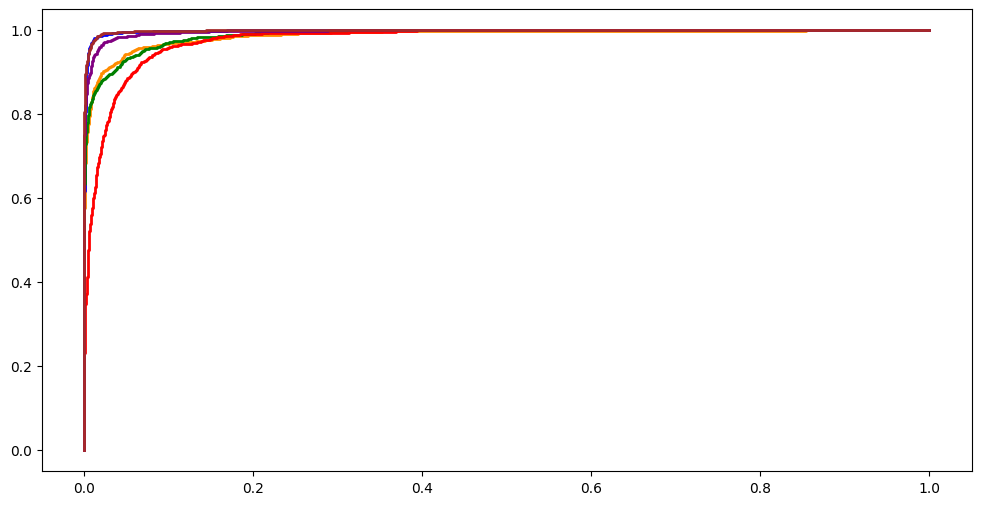

In [ ]:
n_classes = 10
for data in results_dict['PCA-10']['roc_auc_data']:
  fpr, tpr, roc_auc, class_names, n_classes = data

# Function to plot ROC curves
def plot_roc_curves(fpr, tpr, roc_auc, class_names, n_classes):
    plt.figure(figsize=(12, 6))
    colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown']
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

# conf_matrix = results_dict['PCA-10']['Confusion Matrix']

# # Plot confusion matrix
# plt.subplot(1, 2, 2)
# plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# classes = np.unique(y)
# tick_marks = np.arange(len(classes))
# plt.xticks(tick_marks, classes)
# plt.yticks(tick_marks, classes)
# plt.xlabel('Predicted')
# plt.ylabel('True')

# plt.tight_layout()
# plt.show()

plot_roc_curves(fpr, tpr, roc_auc, class_names, n_classes)

In [ ]:
# Function to analyze and visualize results
def analyze_and_visualize_results(results_dict):
    for component_size, result_df in results_dict.items():
        print(f"Results for PCA-{component_size}:")
        print(result_df)

        # Extract ROC data for visualization
        n_classes = len(result_df)
        fpr = {}
        tpr = {}
        roc_auc = {}

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test, result_df['roc_auc'][i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves
        plot_roc_curves(fpr, tpr, roc_auc, class_names=[f'Class {i}' for i in range(n_classes)], n_classes=n_classes)


# Function to plot ROC curves
def plot_roc_curves(fpr, tpr, roc_auc, class_names, n_classes):
    plt.figure(figsize=(12, 6))
    colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown']
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
results_dict

{}

In [ ]:
analyze_and_visualize_results(results_dict)

Results for PCA-PCA-10:
                    Model  Precision    Recall  F1-Score   roc_auc  \
0  DecisionTreeClassifier   0.807924  0.806583  0.805582  0.892573   
1  RandomForestClassifier   0.905233  0.904917  0.904781  0.994211   
2           MultinomialNB   0.908816  0.906167  0.905985  0.957348   
3    KNeighborsClassifier   0.888426  0.887500  0.887556  0.968952   
4                     SVC   0.888788  0.886500  0.887129  0.991704   

                                    Confusion Matrix  
0  [[942, 72, 89, 9, 2, 2, 4, 4, 42, 11], [120, 9...  
1  [[1060, 50, 38, 5, 0, 0, 0, 5, 14, 5], [21, 11...  
2  [[1084, 41, 1, 26, 7, 2, 0, 0, 15, 1], [22, 11...  
3  [[1037, 48, 49, 6, 0, 0, 1, 1, 25, 10], [17, 1...  
4  [[1028, 51, 67, 3, 0, 0, 1, 3, 14, 10], [13, 1...  


ValueError: ignored

In [ ]:
print(visualise)

None


In [ ]:
from pprint import pprint
pprint(results_dict)

{'PCA-10':                     Model  Precision    Recall  F1-Score   roc_auc  \
0  DecisionTreeClassifier   0.807018  0.806167  0.804799  0.892353   
1  RandomForestClassifier   0.908967  0.908750  0.908641  0.994402   
2           MultinomialNB   0.908816  0.906167  0.905985  0.957348   
3    KNeighborsClassifier   0.889035  0.888083  0.888143  0.968738   
4                     SVC   0.888450  0.886083  0.886735  0.991656   

                                    Confusion Matrix  
0  [[958, 67, 79, 13, 2, 3, 5, 1, 37, 12], [136, ...  
1  [[1064, 51, 34, 5, 0, 0, 0, 4, 14, 5], [21, 11...  
2  [[1084, 41, 1, 26, 7, 2, 0, 0, 15, 1], [22, 11...  
3  [[1037, 47, 49, 6, 0, 0, 1, 1, 26, 10], [17, 1...  
4  [[1028, 51, 67, 3, 0, 0, 1, 3, 14, 10], [13, 1...  ,
 'PCA-15':                     Model  Precision    Recall  F1-Score   roc_auc  \
0  DecisionTreeClassifier   0.834103  0.833750  0.833335  0.907657   
1  RandomForestClassifier   0.937822  0.937667  0.937636  0.996859   
2           Mult

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, roc_auc_score, auc
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Function to load data from NPZ files
def load_data(file_path):
    data = np.load(file_path)
    return data['arr_0']

# Flatten the image data
def flatten_data(data):
    return data.reshape(data.shape[0], -1)

# Initialize PCA with the desired number of components
def apply_pca(data, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# Train a classifier and return evaluation metrics
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate ROC-AUC score
    y_prob = classifier.predict_proba(X_test)

    # Check the shape of y_prob
    if y_prob.ndim == 1:
        # If it's a 1D array, reshape it to a 2D array
        y_prob = y_prob.reshape(-1, 1)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

    return precision, recall, f1, confusion_matrix_result, roc_auc

# Function to plot ROC curves
def plot_roc_curves(fpr, tpr, roc_auc, class_names, n_classes):
    plt.figure(figsize=(12, 6))
    colors = ['darkorange', 'blue', 'green', 'red', 'purple', 'brown']
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

# Function to analyze and visualize results
def analyze_and_visualize_results(results_dict):
    for component_size, result_df in results_dict.items():
        print(f"Results for PCA-{component_size}:")
        print(result_df)

        # Extract ROC data for visualization
        n_classes = len(result_df)
        fpr = {}
        tpr = {}
        roc_auc = {}

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test, result_df['roc_auc'][i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curves
        plot_roc_curves(fpr, tpr, roc_auc, class_names=[f'Class {i}' for i in range(n_classes)], n_classes=n_classes)

# Load training and testing data
train_data = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz')
test_data = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz')

# Load labels
y_train = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz')
y_test = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz')

# Define a list of classifiers to experiment with
classifiers = [
    DecisionTreeClassifier(random_state=42, criterion='entropy'),
    RandomForestClassifier(random_state=42),
    MultinomialNB(),
    KNeighborsClassifier(),
    SVC(probability=True)
]

# Dictionary to store results
results_dict = {}

# Experiment with different PCA component sizes
component_sizes = [10, 15, 20, 25]

for n_components in component_sizes:
    X_train_pca = apply_pca(flatten_data(X_train), n_components)
    X_test_pca = apply_pca(flatten_data(X_test), n_components)

    results = []
    for classifier in classifiers:
        model_name = classifier.__class__.__name__

        if model_name == 'MultinomialNB':
            # Use the MultinomialNB classifier without PCA for this specific case
            precision, recall, f1, confusion_matrix_result, roc_auc = train_and_evaluate_classifier(classifier, flatten_data(X_train), y_train, flatten_data(X_test), y_test)
        else:
            # For other classifiers, use PCA as before
            precision, recall, f1, confusion_matrix_result, roc_auc = train_and_evaluate_classifier(classifier, X_train_pca, y_train, X_test_pca, y_test)

        results.append([model_name, precision, recall, f1, roc_auc, confusion_matrix_result])

    results_dict[f'PCA-{n_components}'] = pd.DataFrame(results, columns=['Model', 'Precision', 'Recall', 'F1-Score', 'roc_auc', 'Confusion Matrix'])

# Analyze and visualize the results
analyze_and_visualize_results(results_dict)


ValueError: ignored

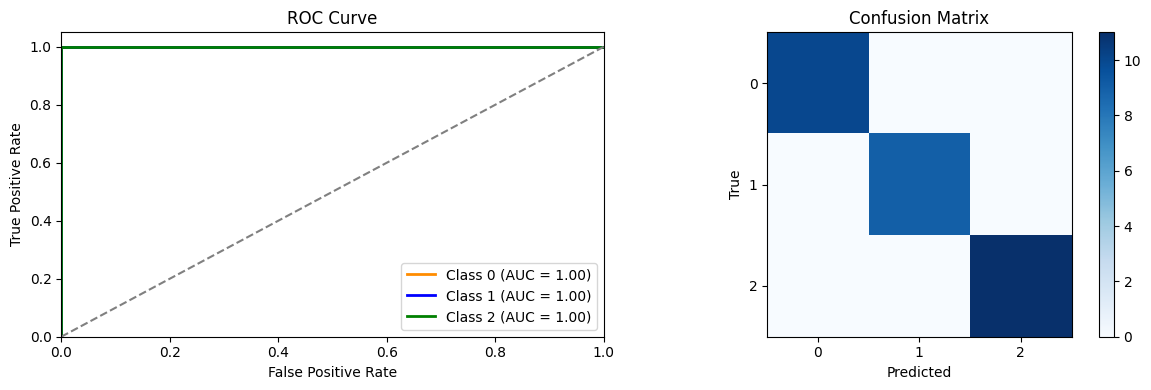

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, roc_auc_score, auc
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load a sample dataset (you can replace this with your own data)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (e.g., Decision Tree Classifier)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate precision, recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC-AUC and plot ROC curve
y_prob = model.predict_proba(X_test)
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='Class 0 (AUC = {:.2f})'.format(roc_auc[0]))
plt.plot(fpr[1], tpr[1], color='blue', lw=2, label='Class 1 (AUC = {:.2f})'.format(roc_auc[1]))
plt.plot(fpr[2], tpr[2], color='green', lw=2, label='Class 2 (AUC = {:.2f})'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Plot confusion matrix
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

# Print precision, recall, and F1-Score
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Function to load data from NPZ files
def load_data(file_path):
    data = np.load(file_path)
    return data['arr_0']

# Load training and testing data
train_data = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz')
test_data = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz')

# Load labels
y_train = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz')
y_test = load_data('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz')

# Flatten the image data
def flatten_data(data):
    return data.reshape(data.shape[0], -1)

# Initialize PCA with the desired number of components
def apply_pca(data, n_components):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

# Train a classifier and return evaluation metrics
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred)

    return precision, recall, f1, confusion_matrix_result

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, y_train, test_size=0.2, random_state=42)

# Define a list of classifiers to experiment with
classifiers = [
    DecisionTreeClassifier(random_state=42, criterion='entropy'),
    RandomForestClassifier(random_state=42),
    # MultinomialNB(),
    KNeighborsClassifier(),
    SVC(probability=True)
]

# Dictionary to store results
results_dict = {}

# Experiment with different PCA component sizes
component_sizes = [10, 15, 20, 25]

for n_components in component_sizes:
    X_train_pca = apply_pca(flatten_data(X_train), n_components)
    X_test_pca = apply_pca(flatten_data(X_test), n_components)

    results = []
    for classifier in classifiers:
        model_name = classifier.__class__.__name__
        precision, recall, f1, confusion_matrix_result = train_and_evaluate_classifier(classifier, X_train_pca, y_train, X_test_pca, y_test)
        print(f"{model_name} (PCA-{n_components}) - Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
        results.append([model_name, precision, recall, f1, confusion_matrix_result])

    results_dict[f'PCA-{n_components}'] = pd.DataFrame(results, columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix'])

# Now you have results for different PCA component sizes stored in results_dict


IndexError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Function to calculate ROC-AUC and plot ROC curve
def calculate_roc_auc(classifier, X_test, y_test, model_name):
    # Calculate ROC-AUC score
    y_prob = classifier.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Create ROC-AUC plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Experiment with different PCA component sizes
component_sizes = [10, 15, 20, 25]

for n_components in component_sizes:
    X_train_pca = apply_pca(flatten_data(X_train), n_components)
    X_test_pca = apply_pca(flatten_data(X_test), n_components)

    results = []
    for classifier in classifiers:
        model_name = classifier.__class__.__name__
        precision, recall, f1, confusion_matrix_result = train_and_evaluate_classifier(classifier, X_train_pca, y_train, X_test_pca, y_test)

        # Calculate ROC-AUC and plot ROC curve
        calculate_roc_auc(classifier, X_test_pca, y_test, model_name)

        print(f"Model: {model_name} (PCA-{n_components})")
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1-Score: {f1}")
        print("Confusion Matrix:\n", confusion_matrix_result)
        print("=" * 50)

        results.append([model_name, precision, recall, f1, confusion_matrix_result])

    results_dict[f'PCA-{n_components}'] = pd.DataFrame(results, columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix'])


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Load the training and testing data from NPZ files
train_data = np.load('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_train.npz')
test_data = np.load('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/X_kannada_MNIST_test.npz')

# Access the image and label arrays
x_train = train_data['arr_0']
x_test = test_data['arr_0']

# Load the corresponding labels
y_train = np.load('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_train.npz')['arr_0']
y_test = np.load('/content/drive/MyDrive/data/Kannada_MNIST_datataset_paper/Kannada_MNIST_npz/Kannada_MNIST/y_kannada_MNIST_test.npz')['arr_0']


# Assuming x_train has shape (num_samples, height, width)
x_train_flattened = x_train.reshape(x_train.shape[0], -1)

# Similarly, flatten the test data
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components (e.g., n_components=10)
pca = PCA(n_components=10)

# Fit and transform the training data
x_train_pca = pca.fit_transform(x_train_flattened)

# Transform the testing data using the same PCA model
x_test_pca = pca.transform(x_test_flattened)

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model on the PCA-reduced training data
dt_classifier.fit(x_train_pca, y_train)

# Make predictions on the PCA-reduced test data
dt_predictions = dt_classifier.predict(x_test_pca)

# Split the data into training and testing sets
def model_training_and_evaluation(x, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    classifiers = [
        DecisionTreeClassifier(random_state=42,criterion='entropy'),
        RandomForestClassifier(random_state=42),
        # MultinomialNB(),
        KNeighborsClassifier(),
        SVC(probability=True)  # Probability=True for SVC
    ]

    results = []
    for classifier in classifiers:
        model_name = classifier.__class__.__name__

        # Fit the classifier on the training data
        classifier.fit(X_train, y_train)

        # Predict on the test data
        y_pred = classifier.predict(X_test)

        # Calculate various evaluation metrics
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion_matrix_result = confusion_matrix(y_test, y_pred)
        # roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
        print(model_name, 'Precision:', precision, 'Recall:', recall, 'F1-Score:', f1)

        # Append the results to the list
        results.append([model_name, precision, recall, f1, confusion_matrix_result])

    # Create a DataFrame from the results list
    results_df = pd.DataFrame(results, columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Confusion Matrix'])

    return results_df
model_training_and_evaluation(x_train_pca, y_train)

DecisionTreeClassifier Precision: 0.9095503579007873 Recall: 0.9093333333333333 F1-Score: 0.9093780687122003
RandomForestClassifier Precision: 0.9532792317041199 Recall: 0.9530833333333333 F1-Score: 0.9530315113888637
KNeighborsClassifier Precision: 0.9630692891027466 Recall: 0.9628333333333333 F1-Score: 0.9628093850068585
SVC Precision: 0.9613398570006022 Recall: 0.9610833333333333 F1-Score: 0.9610769732922906


,Model,Precision,Recall,F1-Score,Confusion Matrix
0,DecisionTreeClassifier,0.909550,0.909333,0.909378,"[[1044, 70, 7, 16, 1, 1, 1, 3, 26, 8], [70, 11..."
1,RandomForestClassifier,0.953279,0.953083,0.953032,"[[1102, 60, 0, 5, 0, 0, 0, 3, 5, 2], [21, 1185..."
2,KNeighborsClassifier,0.963069,0.962833,0.962809,"[[1106, 58, 0, 4, 0, 0, 1, 0, 7, 1], [11, 1201..."
3,SVC,0.961340,0.961083,0.961077,"[[1115, 49, 0, 5, 0, 0, 0, 1, 4, 3], [11, 1197..."


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Load the training and testing data from NPZ files (if not already loaded)
# (Code for data loading)

# Define a list of PCA component sizes to experiment with
component_sizes = [15, 20, 25, 30]

# Function to perform model training and evaluation for different PCA component sizes
def experiment_with_pca_sizes(x, y, component_sizes):
    results_dict = {}  # Store results for each component size

    for size in component_sizes:
        # Initialize PCA with the current component size
        pca = PCA(n_components=size)

        # Fit and transform the training data
        x_train_pca = pca.fit_transform(x)

        # Transform the testing data using the same PCA model
        x_test_pca = pca.transform(x_test_flattened)

        # Perform model training and evaluation as before
        results_df = model_training_and_evaluation(x_train_pca, y_train)

        # Store the results for this component size
        results_dict[size] = results_df

    return results_dict

# Function to perform hyperparameter tuning (GridSearchCV) for a given model
def hyperparameter_tuning(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

# Define hyperparameter grids for models that need tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

# Example usage
best_models = {}
for model_name, model in [('Random Forest', RandomForestClassifier(random_state=42)),
                          ('SVM', SVC(probability=True))]:
    best_model = hyperparameter_tuning(model, param_grid_rf if model_name == 'Random Forest' else param_grid_svc, x_train_pca, y_train)
    best_models[model_name] = best_model
    print(f'Best {model_name} Parameters:', best_model.get_params())

# Once you've selected the best model and PCA configuration, you can proceed with final training and deployment (if needed).


Best Random Forest Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
model_training_and_evaluation(x_train_pca, y_train)


In [ ]:
import pandas as pd

In [ ]:
!unzip /content/drive/MyDrive/data/Dig-MNIST.csv.zip -d /content/kannada
!unzip /content/drive/MyDrive/data/test.csv.zip -d /content/kannada
!unzip /content/drive/MyDrive/data/train.csv.zip -d /content/kannada
!cp /content/drive/MyDrive/data/sample_submission.csv /content/kannada

Archive:  /content/drive/MyDrive/data/Dig-MNIST.csv.zip
replace /content/kannada/Dig-MNIST.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/data/test.csv.zip
replace /content/kannada/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/drive/MyDrive/data/train.csv.zip
replace /content/kannada/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train = pd.read_csv('/content/kannada/train.csv')
test = pd.read_csv('/content/kannada/test.csv')

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load your data into a pandas DataFrame, assuming the last column is the target variable
# Replace 'your_data.csv' with the actual file path or data source
data = pd.read_csv('/content/kannada/test.csv')

# Separate features (X) and target variable (y)
X = data.iloc[:, :-1]  # Select all columns except the last one as features
y = data.iloc[:, -1]   # Select the last column as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier instance
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [ ]:
train.head()

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
train = pd.read_csv('/content/kannada/train.csv')
test = pd.read_csv('/content/kannada/test.csv')

# Step 2: Data Preprocessing
from sklearn.preprocessing import StandardScaler

pixel_columns = train.columns[1:]  # Exclude the label column

# Fit and transform the training data
scaler = StandardScaler()
train[pixel_columns] = scaler.fit_transform(train[pixel_columns])

# Transform the test data using the same scaler
test[pixel_columns] = scaler.transform(test[pixel_columns])

# Step 3: PCA Dimensionality Reduction
n_components = 10  # Adjust as needed
pca = PCA(n_components=n_components)

# Fit PCA on the training data
pca_train_result = pca.fit_transform(train[pixel_columns])

# Transform both the training and test data
pca_train_kannada = pd.DataFrame(data=pca_train_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
pca_test_kannada = pd.DataFrame(data=pca.transform(test[pixel_columns]), columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_train_kannada, train['label'], test_size=0.2, random_state=42)

# Step 4: Model Selection and Training
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('K-NN', KNeighborsClassifier()),
    ('SVM', SVC(probability=True))
]

results = []

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)

    # Step 5: Model Evaluation
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

    results.append({
        'Model': clf_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': confusion_matrix_result,
        'ROC-AUC': roc_auc
    })




0        1.115892
1        2.798259
2        0.266585
3       -1.633760
4       -0.222263
           ...   
59995   -0.253884
59996    0.589395
59997    2.472629
59998   -0.171209
59999   -3.506399
Name: PC10, Length: 60000, dtype: float64

In [ ]:
pca_test_kannada

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.552778,-0.120681,-5.763611,0.897525,1.414289,1.148793,-0.018409,-2.019826,-0.808528,-0.000730
1,-1.630848,-3.655261,-3.161163,2.607980,-2.931986,-2.684560,0.406554,-0.801375,-3.245672,1.458526
2,-1.539784,7.142207,-2.938186,-4.087031,0.375515,-1.513796,0.605609,-1.875907,-1.036667,-3.692768
3,8.462688,-0.121346,2.374626,-2.267595,-2.586572,0.502477,-1.638726,-3.179026,-0.637139,1.645156
4,4.007387,-1.917589,-2.993255,0.820359,3.762122,2.869428,2.157103,0.977333,-2.097105,-3.021532
...,...,...,...,...,...,...,...,...,...,...
4995,-0.210793,-3.934400,-2.461354,3.233459,-2.605268,-4.910166,2.867573,-0.967951,1.721017,-0.212769
4996,-3.662426,-3.123323,-0.208089,2.128891,-5.904626,-3.476368,4.405775,-0.071496,-0.566359,-1.321411
4997,0.112222,-1.876772,-4.107844,-2.359335,-1.131468,-0.730925,-0.614526,-2.355505,2.276210,2.481005
4998,9.048037,-1.805751,9.290153,-2.406830,-2.865510,-0.570998,1.306450,2.018230,-0.580567,-0.613974


In [ ]:
df = pd.DataFrame(results)
df

,Model,Precision,Recall,F1-Score,Confusion Matrix,ROC-AUC
0,Decision Tree,0.901604,0.901500,0.901471,"[[1072, 57, 2, 13, 0, 2, 1, 4, 26, 0], [46, 11...",0.945134
1,Random Forest,0.949428,0.949250,0.949299,"[[1105, 50, 1, 7, 0, 0, 1, 0, 10, 3], [14, 118...",0.997802
2,Naive Bayes,0.847608,0.842250,0.842268,"[[1021, 80, 2, 22, 3, 2, 0, 2, 42, 3], [21, 10...",0.984055
3,K-NN,0.959478,0.959333,0.959340,"[[1116, 48, 0, 6, 0, 0, 0, 0, 5, 2], [11, 1202...",0.992701
4,SVM,0.954825,0.954667,0.954688,"[[1115, 44, 0, 7, 0, 0, 1, 0, 8, 2], [9, 1195,...",0.998433


           Model  Precision    Recall  F1-Score  \
0  Decision Tree   0.903878  0.903750  0.903706   
1  Random Forest   0.950198  0.950000  0.950065   
2    Naive Bayes   0.849229  0.843833  0.843942   
3           K-NN   0.959567  0.959417  0.959431   
4            SVM   0.954423  0.954250  0.954274   

                                    Confusion Matrix   ROC-AUC  
0  [[1081, 51, 3, 12, 1, 1, 1, 2, 23, 2], [40, 11...  0.946367  
1  [[1112, 48, 0, 6, 0, 0, 1, 1, 7, 2], [17, 1185...  0.998019  
2  [[1022, 79, 2, 22, 3, 1, 0, 3, 43, 2], [22, 10...  0.984226  
3  [[1116, 48, 0, 6, 0, 0, 0, 0, 5, 2], [11, 1202...  0.992645  
4  [[1114, 46, 0, 7, 0, 0, 1, 0, 7, 2], [8, 1194,...  0.998439  


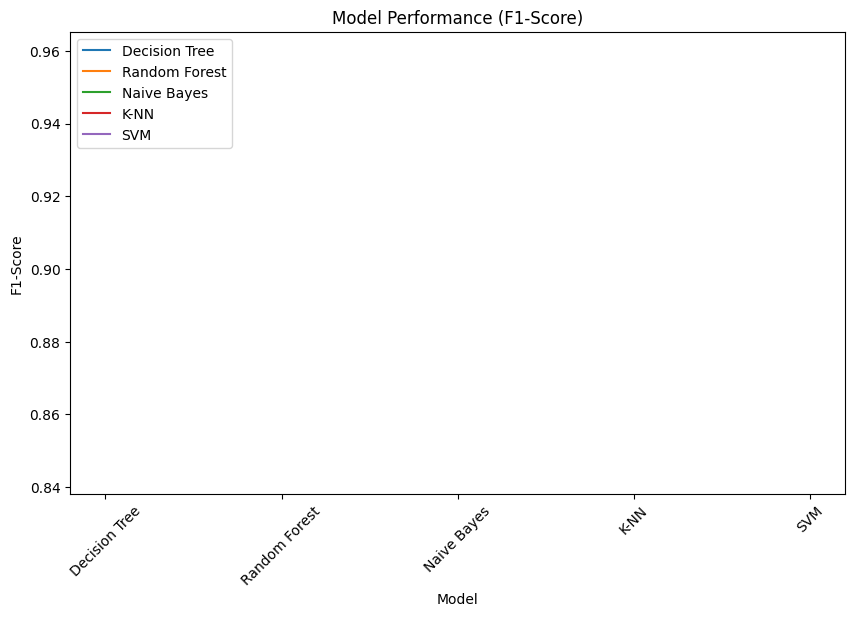

In [ ]:
# Step 6: Display Model Evaluation Results
results_df = pd.DataFrame(results)
print(results_df)

# Step 7: Visualize Model Performance (example: F1-Score vs. Model)
plt.figure(figsize=(10, 6))
for model in classifiers:
    model_name = model[0]
    model_results = results_df[results_df['Model'] == model_name]
    plt.plot(model_results['Model'], model_results['F1-Score'], label=model_name)

plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.legend()
plt.title('Model Performance (F1-Score)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
results_df

,Model,Precision,Recall,F1-Score,Confusion Matrix,ROC-AUC
0,Decision Tree,0.903128,0.902917,0.902942,"[[1082, 45, 3, 14, 0, 1, 0, 1, 28, 3], [53, 11...",0.945937
1,Random Forest,0.950099,0.949917,0.949958,"[[1108, 49, 1, 7, 0, 0, 1, 0, 9, 2], [14, 1191...",0.998002
2,Naive Bayes,0.848313,0.842917,0.843017,"[[1018, 83, 2, 22, 3, 1, 0, 3, 42, 3], [22, 10...",0.984221
3,K-NN,0.958894,0.958750,0.958759,"[[1116, 48, 0, 5, 0, 0, 0, 0, 6, 2], [11, 1202...",0.992688
4,SVM,0.953504,0.953333,0.953364,"[[1114, 46, 0, 7, 0, 0, 1, 0, 7, 2], [10, 1194...",0.998417


In [ ]:
from sklearn.preprocessing import StandardScaler

pixel_columns = train.columns[1:]  # Exclude the label column

# Fit and transform both train and test data using the same scaler
scaler = StandardScaler()
train[pixel_columns] = scaler.fit_transform(train[pixel_columns])
test[pixel_columns] = scaler.transform(test[pixel_columns])


from sklearn.decomposition import PCA

n_components = 10  # Adjust as needed
pca = PCA(n_components=n_components)

# Fit PCA on the training data and transform both train and test data
pca_train_result = pca.fit_transform(train[pixel_columns])
pca_test_result = pca.transform(test[pixel_columns])

# Create DataFrames for the PCA results
pca_train_kannada = pd.DataFrame(data=pca_train_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
pca_test_df = pd.DataFrame(data=pca_test_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])

y_train_kannada=pca_train_kannada['PC1']

from sklearn.model_selection import train_test_split

# Perform the split once
pca_train_kannada, pca_test_df, y_train_kannada, y_test_kannada = train_test_split(pca_train_kannada, y_train_kannada, test_size=0.2, random_state=42)


In [ ]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Before passing your data to PCA (Principal Component Analysis), it's important to preprocess the data appropriately. PCA is a dimensionality reduction technique that works well when the data is centered (mean-centered) and has a consistent scale (standardized). Here are the steps to prepare your data for PCA:

1. **Separate Labels and Features:**
   - The 'label' column (e.g., 'label') contains the class labels (assuming it's a classification problem), while the 'pixel' columns contain the pixel values.

2. **Normalize the Pixel Values:**
   - PCA is sensitive to the scale of features. To ensure that all pixel values have the same scale, you should normalize them. This typically involves scaling pixel values to have a mean of 0 and a standard deviation of 1 (z-score normalization).

   ```python
   from sklearn.preprocessing import StandardScaler

   # Assuming your data is in a DataFrame called 'df'
   pixel_columns = df.columns[1:]  # Exclude the label column
   scaler = StandardScaler()
   df[pixel_columns] = scaler.fit_transform(df[pixel_columns])
   ```

3. **Center the Data:**
   - PCA assumes that the data is centered, meaning that the mean of each feature (pixel in this case) is 0. Ensure that your data is centered by subtracting the mean from each feature.

   ```python
   # Center the data by subtracting the mean
   df[pixel_columns] = df[pixel_columns] - df[pixel_columns].mean()
   ```

4. **Apply PCA:**
   - Now that your data is properly preprocessed, you can apply PCA to reduce its dimensionality. You can use libraries like scikit-learn to perform PCA.

   ```python
   from sklearn.decomposition import PCA

   # Specify the number of components you want to retain
   n_components = 10  # Adjust this based on your specific needs
   pca = PCA(n_components=n_components)

   # Fit and transform the data
   pca_result = pca.fit_transform(df[pixel_columns])

   # Create a DataFrame with the PCA results
   pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])

   # Combine the label column with the PCA results if needed
   pca_df['label'] = df['label']
   ```

5. **Optional: Visualization and Analysis:**
   - You can visualize the results of PCA to understand how much variance is explained by each principal component and make decisions about the number of components to retain.

Now, you have a dataset where most of the variance is captured by a reduced number of principal components (PCs). You can use this reduced-dimensional data for further analysis or machine learning tasks. Adjust the number of components based on your specific requirements and the amount of variance you want to retain.

In [ ]:
from sklearn.preprocessing import StandardScaler

pixel_columns = train.columns[1:]  # Exclude the label column
pixel_columns = test.columns[1:]
scaler = StandardScaler()
train[pixel_columns] = scaler.fit_transform(train[pixel_columns])
test[pixel_columns] = scaler.fit_transform(test[pixel_columns])

# Center the data by subtracting the mean
train[pixel_columns] = train[pixel_columns] - train[pixel_columns].mean()
test[pixel_columns] = test[pixel_columns] - test[pixel_columns].mean()


from sklearn.decomposition import PCA

# Specify the number of components you want to retain
n_components = 10  # Adjust this based on your specific needs
pca = PCA(n_components=n_components)

# Fit and transform the data
pca_train_result = pca.fit_transform(train[pixel_columns])
pca_test_result = pca.fit_transform(test[pixel_columns])

# Create a DataFrame with the PCA results
pca_train_kannada = pd.DataFrame(data=pca_train_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
pca_test_df = pd.DataFrame(data=pca_test_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
# # Combine the label column with the PCA results if needed
# pca_df['label'] = df['label']

y_train_kannada=pca_train_kannada['PC1']

y_test_kannada=pca_test_df['PC1']

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

pca_train_kannada,pca_test_df,y_train_kannada,y_test_kannada = train_test_split(pca_train_kannada,y_train_kannada,test_size=0.2,random_state=42)
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
for model in models:
  model.fit(pca_train_kannada,y_train_kannada)
  train_pred = model.predict(pca_train_kannada)
  test_pred = model.predict(pca_test_df)
  print(type(model).__name__)
  print("*******Train************")
  print("Accuracy: ",accuracy_score(y_train_kannada,train_pred))
  print("Precision: ",precision_score(y_train_kannada,train_pred))
  print("Recall: ",recall_score(y_train_kannada,train_pred))
  print("F1 Score: ",f1_score(y_train_kannada,train_pred))
  train_accuracies.append(accuracy_score(y_train_kannada,train_pred))
  train_precisions.append(precision_score(y_train_kannada,train_pred))
  train_recalls.append(recall_score(y_train_kannada,train_pred))
  train_f1s.append(f1_score(y_train_kannada,train_pred))

  print("*******Test************")
  print("Accuracy: ",accuracy_score(y_test_kannada,test_pred))
  print("Precision: ",precision_score(y_test_kannada,test_pred))
  print("Recall: ",recall_score(y_test_kannada,test_pred))
  print("F1 Score: ",f1_score(y_test_kannada,test_pred))
  test_accuracies.append(accuracy_score(y_test_kannada,test_pred))
  test_precisions.append(precision_score(y_test_kannada,test_pred))
  test_recalls.append(recall_score(y_test_kannada,test_pred))
  test_f1s.append(f1_score(y_test_kannada,test_pred))
  print("\n \n")
train_df = pd.DataFrame()
train_df['Accuracy'] =  train_accuracies
train_df['Precision'] =  train_precisions
train_df['Recall'] =  train_recalls
train_df['F1 Score'] =  train_f1s
train_df['Mechanism'] = "Train"
train_df['Model'] = ['Logistic Regression','KNN','DT']

test_df = pd.DataFrame()
test_df['Accuracy'] =  test_accuracies
test_df['Precision'] =  test_precisions
test_df['Recall'] =  test_recalls
test_df['F1 Score'] =  test_f1s
test_df['Mechanism'] = "Test"
test_df['Model'] = ['Logistic Regression','KNN','DT']

result_df = pd.concat([train_df, test_df])
for metric in ['Accuracy','Precision','Recall','F1 Score']:
  sns.lineplot(data =result_df,x ='Model',y = metric,hue="Mechanism")
  plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Specify the number of components you want to retain
n_components = 10  # Adjust this based on your specific needs
pca = PCA(n_components=n_components)

# Fit and transform the data
pca_train_result = pca.fit_transform(train[pixel_columns])
pca_test_result = pca.fit_transform(test[pixel_columns])

# Create a DataFrame with the PCA results
pca_train_kannada = pd.DataFrame(data=pca_train_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
pca_test_df = pd.DataFrame(data=pca_test_result, columns=[f'PC{i}' for i in range(1, n_components + 1)])
# # Combine the label column with the PCA results if needed
# pca_df['label'] = df['label']

In [ ]:
y_train_kannada=pca_train_kannada['PC1']

In [ ]:
y_test_kannada=pca_test_df['PC1']

0        -4.287227
1        -2.037585
2         1.819231
3         2.814400
4         0.963072
           ...    
59995     0.536844
59996     5.498089
59997    11.020907
59998    -9.187966
59999    -9.774109
Name: PC1, Length: 60000, dtype: float64

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

pca_train_kannada,pca_test_df,y_train_kannada,y_test_kannada = train_test_split(pca_train_kannada,y_train_kannada,test_size=0.2,random_state=42)
models = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
for model in models:
  model.fit(pca_train_kannada,y_train_kannada)
  train_pred = model.predict(pca_train_kannada)
  test_pred = model.predict(pca_test_df)
  print(type(model).__name__)
  print("*******Train************")
  print("Accuracy: ",accuracy_score(y_train_kannada,train_pred))
  print("Precision: ",precision_score(y_train_kannada,train_pred))
  print("Recall: ",recall_score(y_train_kannada,train_pred))
  print("F1 Score: ",f1_score(y_train_kannada,train_pred))
  train_accuracies.append(accuracy_score(y_train_kannada,train_pred))
  train_precisions.append(precision_score(y_train_kannada,train_pred))
  train_recalls.append(recall_score(y_train_kannada,train_pred))
  train_f1s.append(f1_score(y_train_kannada,train_pred))

  print("*******Test************")
  print("Accuracy: ",accuracy_score(y_test_kannada,test_pred))
  print("Precision: ",precision_score(y_test_kannada,test_pred))
  print("Recall: ",recall_score(y_test_kannada,test_pred))
  print("F1 Score: ",f1_score(y_test_kannada,test_pred))
  test_accuracies.append(accuracy_score(y_test_kannada,test_pred))
  test_precisions.append(precision_score(y_test_kannada,test_pred))
  test_recalls.append(recall_score(y_test_kannada,test_pred))
  test_f1s.append(f1_score(y_test_kannada,test_pred))
  print("\n \n")
train_df = pd.DataFrame()
train_df['Accuracy'] =  train_accuracies
train_df['Precision'] =  train_precisions
train_df['Recall'] =  train_recalls
train_df['F1 Score'] =  train_f1s
train_df['Mechanism'] = "Train"
train_df['Model'] = ['Logistic Regression','KNN','DT']

test_df = pd.DataFrame()
test_df['Accuracy'] =  test_accuracies
test_df['Precision'] =  test_precisions
test_df['Recall'] =  test_recalls
test_df['F1 Score'] =  test_f1s
test_df['Mechanism'] = "Test"
test_df['Model'] = ['Logistic Regression','KNN','DT']

result_df = pd.concat([train_df, test_df])
for metric in ['Accuracy','Precision','Recall','F1 Score']:
  sns.lineplot(data =result_df,x ='Model',y = metric,hue="Mechanism")
  plt.show()

ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define a function for evaluating a classifier
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Compute ROC curve and ROC-AUC score for binary classification (assuming 2 classes)
    if len(np.unique(y_train)) == 2:
        y_pred_proba = classifier.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        plt.show()

    # Print metrics
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print()

# Define the classifiers to be used
classifiers = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(probability=True, random_state=42)
]

# Assuming you have your training and testing labels as y_train and y_test
for classifier in classifiers:
    evaluate_classifier(classifier, pca_train_df, y_train, pca_test_df, y_test)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Load your image dataset (assuming it's a CSV file with pixels and labels)
# data = pd.read_csv('your_image_data.csv')

# Separate the features (pixels) and labels
X = train.iloc[:, :-1]  # Features (pixels)
y = train.iloc[:, -1]  # Labels

# Initialize component sizes to experiment with
component_sizes = [10, 15, 20, 25, 30]

for n_components in component_sizes:
    # Perform PCA to reduce dimensions
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Initialize and train various classifiers
    classifiers = {
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Naive Bayes": GaussianNB(),
        "K-NN": KNeighborsClassifier(),
        "SVM": SVC(probability=True, random_state=42)
    }

    for classifier_name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        cm = confusion_matrix(y_test, y_pred)

        # Compute ROC curve and ROC-AUC score for binary classification (assuming 2 classes)
        if len(np.unique(y)) == 2:
            le = LabelEncoder()
            y_test_encoded = le.fit_transform(y_test)
            y_pred_proba = classifier.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_proba)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic')
            plt.legend(loc='lower right')
            plt.show()

        # Print metrics
        print(f"Component Size: {n_components}")
        print(f"Classifier: {classifier_name}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-Score: {f1:.2f}")
        print("Confusion Matrix:")
        print(cm)
        print()


Component Size: 10
Classifier: Decision Tree
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[12000]]

Component Size: 10
Classifier: Random Forest
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[12000]]

Component Size: 10
Classifier: Naive Bayes
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[12000]]

Component Size: 10
Classifier: K-NN
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[12000]]



ValueError: ignored

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Separate the features (pixels) and labels
X = train.iloc[:, :-1]  # Features (pixels)
y = train.iloc[:, -1]  # Labels
# create a validation set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

model = LogisticRegression()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)
print("******Train************")
print("Accuracy: ",accuracy_score(y_train,train_pred))
print("Precision: ",precision_score(y_train,train_pred))
print("Recall: ", recall_score(y_train,train_pred))
print("F1 score: ",f1_score(y_train,train_pred))
print("******Test************")
print("Accuracy: ",accuracy_score(y_test,test_pred))
print("Precision: ",precision_score(y_test,test_pred))
print("Recall: ", recall_score(y_test,test_pred))
print("F1 score: ",f1_score(y_test,test_pred))

ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define your target labels (assuming they are stored in 'y_train' and 'y_test')
# Separate the features (pixels) and labels
X = train.iloc[:, :-1]  # Features (pixels)
y = train.iloc[:, -1]  # Labels
# create a validation set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state = 42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
dt_predictions = dt_classifier.predict(x_train)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
rf_predictions = rf_classifier.predict(x_train)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)
nb_predictions = nb_classifier.predict(x_train)

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
knn_predictions = knn_classifier.predict(x_train)

# # Support Vector Machine Classifier
# svm_classifier = SVC(probability=True)  # probability=True to compute ROC-AUC later
# svm_classifier.fit(x_train, y_train)
# svm_predictions = svm_classifier.predict(x_train)

# Model Evaluation
def evaluate_model(model_name, predictions):
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, predictions))

    print(f"Confusion Matrix for {model_name}:\n")
    print(confusion_matrix(y_test, predictions))

    # # ROC-AUC Score
    # if model_name == "Support Vector Machine":
    #     y_prob = svm_classifier.predict_proba(pca_test_df)
    #     auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
    # else:
    # auc_score = roc_auc_score(y_test, predictions, multi_class='ovr')

    # print(f"ROC-AUC Score for {model_name}: {auc_score}\n")

    # ROC Curve (for binary classification or one-vs-rest in multiclass)
    if len(y_test.unique()) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        # Plot ROC curve if needed

# Evaluate each model
evaluate_model("Decision Trees", dt_predictions)
evaluate_model("Random Forest", rf_predictions)
evaluate_model("Naive Bayes", nb_predictions)
evaluate_model("K-Nearest Neighbors", knn_predictions)
# evaluate_model("Support Vector Machine", svm_predictions)


Classification Report for Decision Trees:



ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load your PCA-transformed data (assuming it's in a DataFrame called 'data')
# You should also load the labels (target) if they are not included in the 'data' DataFrame

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Support Vector Machine Classifier
svm_classifier = SVC(probability=True)  # probability=True to compute ROC-AUC later
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Model Evaluation
def evaluate_model(model_name, predictions):
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, predictions))

    print(f"Confusion Matrix for {model_name}:\n")
    print(confusion_matrix(y_test, predictions))

    # ROC-AUC Score
    if model_name == "Support Vector Machine":
        y_prob = svm_classifier.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        auc_score = roc_auc_score(y_test, predictions, multi_class='ovr')

    print(f"ROC-AUC Score for {model_name}: {auc_score}\n")

    # ROC Curve (for binary classification or one-vs-rest in multiclass)
    if len(y_test.unique()) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        # Plot ROC curve if needed

# Evaluate each model
evaluate_model("Decision Trees", dt_predictions)
evaluate_model("Random Forest", rf_predictions)
evaluate_model("Naive Bayes", nb_predictions)
evaluate_model("K-Nearest Neighbors", knn_predictions)
evaluate_model("Support Vector Machine", svm_predictions)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize the models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
naive_bayes = GaussianNB()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()

# Fit the models
decision_tree.fit(X_train_pca, y_train)
random_forest.fit(X_train_pca, y_train)
naive_bayes.fit(X_train_pca, y_train)
knn_classifier.fit(X_train_pca, y_train)
svm_classifier.fit(X_train_pca, y_train)

# Evaluate the models
decision_tree_score = decision_tree.score(X_test_pca, y_test)
random_forest_score = random_forest.score(X_test_pca, y_test)
naive_bayes_score = naive_bayes.score(X_test_pca, y_test)
knn_classifier_score = knn_classifier.score(X_test_pca, y_test)
svm_classifier_score = svm_classifier.score(X_test_pca, y_test)

# Display the results
print("Decision Tree Accuracy:", decision_tree_score)
print("Random Forest Accuracy:", random_forest_score)
print("Naive Bayes Accuracy:", naive_bayes_score)
print("K-NN Classifier Accuracy:", knn_classifier_score)
print("SVM Classifier Accuracy:", svm_classifier_score)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset (replace 'your_dataset.csv' with your dataset file)
data = pd.read_csv('your_dataset.csv')

# Split data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Define categorical and numerical columns (customize this based on your dataset)
categorical_cols = ['categorical_feature1', 'categorical_feature2']
numerical_cols = ['numerical_feature1', 'numerical_feature2']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values with mean imputation
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values with mode imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the machine learning model you want to use (e.g., RandomForestClassifier)
# model = RandomForestClassifier()

# Bundle preprocessing and modeling code in a pipeline
# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('model', model)])

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing of training data, fit model
# clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
# preds = clf.predict(X_test)

# Evaluate the model
# from sklearn.metrics import accuracy_score
# print("Accuracy:", accuracy_score(y_test, preds))

# You can uncomment and customize the remaining code based on your specific needs
